# Bilayer Sonophore model: computation of balance quasi-static deflection

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PySONIC.core import BilayerSonophore

### Functions

In [2]:
def plotZeq(bls, ng_range, Q_range, fs=15):
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.set_xlabel('$Q_m\ (nC/cm^2)$', fontsize=fs)
    ax.set_ylabel('$Z_{eq}\ (nm)$', fontsize=fs)
    for ng in ng_range:
        ZeqQS = np.array([bls.balancedefQS(ng, Q) for Q in Q_range])
        ax.plot(Q_range * 1e5, ZeqQS * 1e9, label=f'ng = {(ng * 1e22):.2f}e-22 mole')
    for item in ax.get_xticklabels() + ax.get_yticklabels():
        item.set_fontsize(fs)
    for key in ['top', 'right']:
        ax.spines[key].set_visible(False)
    ax.legend(fontsize=fs, loc='center right', bbox_to_anchor=(1.8, 0.5), frameon=False)
    fig.tight_layout()
    return fig

### Parameters

In [3]:
a = 32e-9  # in-plane radius (m)
Cm0 = 1e-2
Qm0 = -71.9e-5
bls = BilayerSonophore(a, Cm0, Qm0)
charges = np.linspace(-80, 40, 200) * 1e-5
gas = np.linspace(0.5 * bls.ng0, 2.0 * bls.ng0, 5)

### Balance deflections

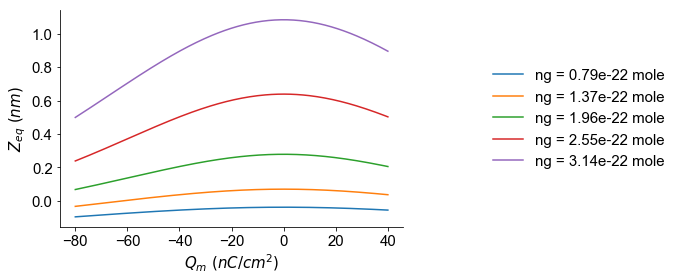

In [4]:
fig = plotZeq(bls, gas, charges)